In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Importing necessary modules

In [2]:
df=pd.read_excel('DS - Assignment Part 1 data set.xlsx') # Reading the file and storing in a dataframe df

In [3]:
df.shape

(414, 9)

In [4]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [5]:
df.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

In [6]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [7]:
df.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

The dataset has no null values

# Initial Understanding

The dataset is clean and has no null values

Transaction date: represents the day the property was sold. The whole number reprenting the year and the decimal values reprenting the date & month in floats value.

House Age: represents the age of the house in float.

Distance from nearest Metro station (km): KM distance from nearest metro station

Number of convenience stores: Number of convenience stores present nearby the property

latitude:        
longitude: Location values in float

Number of bedrooms: num of bedrooms in int

House size (sqft): area of house/property

House price of unit area: Target variable

# Renaming the column names for our convenience

In [8]:
df.rename(columns={'Transaction date':'transaction_date','House Age':'age',
                   'Distance from nearest Metro station (km)':'metro_distance',
                  'Number of convenience stores':'stores','Number of bedrooms':'bedrooms',
                   'House size (sqft)':'area','House price of unit area':'price'}, inplace=True)

In [9]:
df.head()

,transaction_date,age,metro_distance,stores,latitude,longitude,bedrooms,area,price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


# Defining a function that could return outliers or a dataframe without outliers based on our choice

In [10]:
def check_outlier(df,col, remove_outlier=False):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    low=q1-IQR*1.5
    high=q3+IQR*1.5
    if remove_outlier==False:
        return(df[(df[col]<low)|(df[col]>high)])
    else:
        return(df[(df[col]>low)&(df[col]<high)])

In [11]:
check_outlier(df,'price', remove_outlier=False)

,transaction_date,age,metro_distance,stores,latitude,longitude,bedrooms,area,price
220,2013.333333,37.2,186.5101,9,24.97703,121.54265,2,1187,78.3
270,2013.333333,10.8,252.5822,1,24.97460,121.53046,2,1373,117.5
312,2013.583333,35.4,318.5292,9,24.97071,121.54069,1,433,78.0


The target variable price has three outlier values that are on far right of the distribution 

In [12]:
#OPTIONAL remove outliers from dataframe
#df=check_outlier(df,'price', remove_outlier=True)

In [13]:
df.drop('transaction_date', axis=1, inplace=True) # Dropping the transaction_date column

# Clustering properties based on their neighbourhood
Check assignment1_EDA for choice of n_clusters=7 

In [14]:
km=KMeans(n_clusters=7)
km.fit(df[['latitude','longitude']])
y=km.predict(df[['latitude','longitude']])
df['neighbourhood']=y


Text(0.5, 1.0, 'Real Distribution')

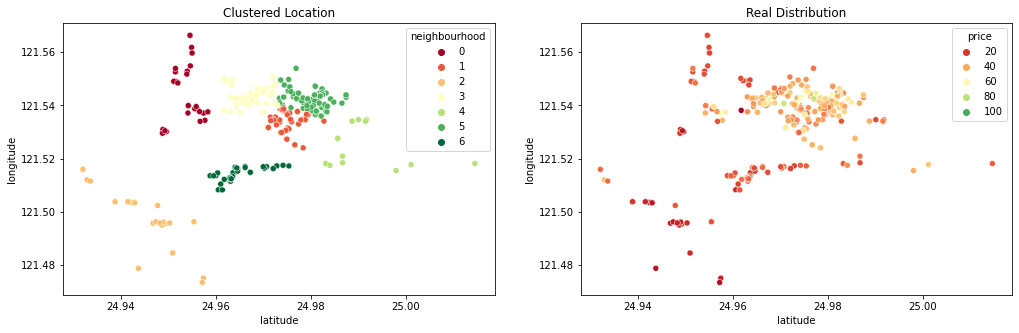

In [15]:
fig,ax=plt.subplots(1,2,figsize=(17,5))
sns.scatterplot(data=df,x='latitude',y='longitude', hue='neighbourhood',palette='RdYlGn', ax=ax[0])
ax[0].set_title("Clustered Location")
sns.scatterplot(data=df,x='latitude',y='longitude', hue='price',palette='RdYlGn',ax=ax[1])
ax[1].set_title("Real Distribution")

In [16]:
df.sample(5)

,age,metro_distance,stores,latitude,longitude,bedrooms,area,price,neighbourhood
28,19.2,557.4780,4,24.97419,121.53797,3,1130,47.0,1
163,8.5,104.8101,5,24.96674,121.54067,1,565,55.5,3
173,41.3,401.8807,4,24.98326,121.54460,3,889,35.1,5
55,31.7,1160.6320,0,24.94968,121.53009,3,1036,13.7,0
37,12.0,1360.1390,1,24.95204,121.54842,1,511,25.3,0


In [17]:
#Changing neighbourhood type as category for future ML model efficiency
df.neighbourhood=df.neighbourhood.astype('category')

In [18]:
#Dropping  latitude and longitude columns
df.drop(columns=['latitude','longitude'], inplace=True)

In [19]:
df.head()

,age,metro_distance,stores,bedrooms,area,price,neighbourhood
0,32.0,84.87882,10,1,575,37.9,5
1,19.5,306.59470,9,2,1240,42.2,5
2,13.3,561.98450,5,3,1060,47.3,5
3,13.3,561.98450,5,2,875,54.8,5
4,5.0,390.56840,5,1,491,43.1,5


In [20]:
#encoding non-numeric columns
df=pd.get_dummies(df)

In [21]:
df.head()

,age,metro_distance,stores,bedrooms,area,price,neighbourhood_0,neighbourhood_1,neighbourhood_2,neighbourhood_3,neighbourhood_4,neighbourhood_5,neighbourhood_6
0,32.0,84.87882,10,1,575,37.9,0,0,0,0,0,1,0
1,19.5,306.59470,9,2,1240,42.2,0,0,0,0,0,1,0
2,13.3,561.98450,5,3,1060,47.3,0,0,0,0,0,1,0
3,13.3,561.98450,5,2,875,54.8,0,0,0,0,0,1,0
4,5.0,390.56840,5,1,491,43.1,0,0,0,0,0,1,0


In [22]:
#Splitting dataset into train test subset
train_X,test_X,train_y,test_y=train_test_split(df.drop('price', axis=1), df.price, random_state=13,test_size=0.2)

# Defining a function to check performance of multiple models 

In [23]:
def train_test(train_X,test_X,train_y,test_y,metric=mean_squared_error):
    
    model_lr=LinearRegression()
    model_lr.fit(train_X,train_y)
    pred_y=model_lr.predict(test_X)
    print("Linear Regression Model Error",metric(test_y,pred_y))
    
    model_dt=DecisionTreeRegressor()
    model_dt.fit(train_X,train_y)
    pred_y=model_dt.predict(test_X)
    print("Decision Tree Regression Model Error",metric(test_y,pred_y))
    
    model_rf=RandomForestRegressor()
    model_rf.fit(train_X,train_y)
    pred_y=model_rf.predict(test_X)
    print("Random Forest Regression Model Error",metric(test_y,pred_y))
    
    model_ridge=Ridge()
    model_ridge.fit(train_X,train_y)
    pred_y=model_ridge.predict(test_X)
    print("Ridge Regression Model Error",metric(test_y,pred_y))
    
    model_lasso=Lasso()
    model_lasso.fit(train_X,train_y)
    pred_y=model_lasso.predict(test_X)
    print("Lasso Regression Model Error",metric(test_y,pred_y))
    
    model_svr=SVR()
    model_svr.fit(train_X,train_y)
    pred_y=model_svr.predict(test_X)
    print("SVR Regression Model Error",metric(test_y,pred_y))

# without normalization

# Baseline model error

In [24]:
# (Checking model performance if our model predicts mean of price as result  )

mean_squared_error(df.price,np.full((df.shape[0],),df.price.mean()))


184.68931783705568

# Checking how different models would perform over our dataset

In [25]:
train_test(train_X,test_X,train_y,test_y,mean_squared_error)

Linear Regression Model Error 38.36064434301787
Decision Tree Regression Model Error 93.35457831325301
Random Forest Regression Model Error 38.54454796385544
Ridge Regression Model Error 38.41621807273843
Lasso Regression Model Error 56.84804136108459
SVR Regression Model Error 58.61169539206344


# Normalize dataset before prediction

# using MinMax Scaler

In [26]:
df.columns

Index(['age', 'metro_distance', 'stores', 'bedrooms', 'area', 'price',
       'neighbourhood_0', 'neighbourhood_1', 'neighbourhood_2',
       'neighbourhood_3', 'neighbourhood_4', 'neighbourhood_5',
       'neighbourhood_6'],
      dtype='object')

In [27]:
mms=MinMaxScaler()
min_max_scaled_df=pd.DataFrame(mms.fit_transform(df.drop(columns=['price'],axis=1)), columns=['age', 'metro_distance', 
                                                                                              'stores', 'bedrooms', 'area', 
                                                                                              'neighbourhood_0', 'neighbourhood_1', 'neighbourhood_2',
                                                                                              'neighbourhood_3','neighbourhood_4','neighbourhood_5','neighbourhood_6'])

In [28]:
min_max_scaled_df

,age,metro_distance,stores,bedrooms,area,neighbourhood_0,neighbourhood_1,neighbourhood_2,neighbourhood_3,neighbourhood_4,neighbourhood_5,neighbourhood_6
0,0.730594,0.009513,1.0,0.0,0.157559,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.445205,0.043809,0.9,0.5,0.763206,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.303653,0.083315,0.5,1.0,0.599271,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.303653,0.083315,0.5,0.5,0.430783,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.114155,0.056799,0.5,0.0,0.081056,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
409,0.312785,0.627820,0.0,1.0,0.365209,0.0,0.0,1.0,0.0,0.0,0.0,0.0
410,0.127854,0.010375,0.9,0.5,0.797814,0.0,0.0,0.0,0.0,0.0,1.0,0.0
411,0.429224,0.056861,0.7,0.0,0.091985,0.0,0.0,0.0,0.0,0.0,1.0,0.0
412,0.184932,0.012596,0.5,0.0,0.177596,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
train_X,test_X,train_y,test_y=train_test_split(min_max_scaled_df, df.price, random_state=13,test_size=0.2)
train_test(train_X,test_X,train_y,test_y)

Linear Regression Model Error 38.36064434301767
Decision Tree Regression Model Error 99.68084337349399
Random Forest Regression Model Error 34.315221939759056
Ridge Regression Model Error 38.917149576637094
Lasso Regression Model Error 69.8736139480696
SVR Regression Model Error 43.23847190916937


# Scaling the dataset has improved the result all models and RandomForestRegressor is the best performer among all. 
We can tune parameters of RandomForest model to see if we can get a better result from it

In [30]:
clf = GridSearchCV(RandomForestRegressor(), {
    'n_estimators': [40,50,60,70,80,90],
    'min_samples_split':[2,5,7,10],
    'max_leaf_nodes':[8,6,32]
    
}, cv=10, return_train_score=True)
clf.fit(train_X,train_y)


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_leaf_nodes': [8, 6, 32],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [40, 50, 60, 70, 80, 90]},
             return_train_score=True)

In [31]:
result=pd.DataFrame(clf.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.081601,0.018184,0.008297,0.002831,8,2,40,"{'max_leaf_nodes': 8, 'min_samples_split': 2, ...",0.552827,0.627160,...,0.787743,0.756060,0.761775,0.768486,0.774703,0.777540,0.785695,0.754858,0.770318,0.010808
1,0.092698,0.011297,0.007328,0.001432,8,2,50,"{'max_leaf_nodes': 8, 'min_samples_split': 2, ...",0.458056,0.662745,...,0.779549,0.766298,0.760865,0.762246,0.778440,0.772916,0.792936,0.767304,0.772423,0.009499
2,0.097201,0.009687,0.007701,0.000463,8,2,60,"{'max_leaf_nodes': 8, 'min_samples_split': 2, ...",0.533047,0.656263,...,0.782263,0.766528,0.762526,0.770987,0.773995,0.774975,0.794301,0.767255,0.773247,0.008815
3,0.106255,0.006001,0.007997,0.000890,8,2,70,"{'max_leaf_nodes': 8, 'min_samples_split': 2, ...",0.528282,0.648530,...,0.782426,0.766383,0.765538,0.771147,0.766398,0.772352,0.790110,0.764237,0.772052,0.007810
4,0.151461,0.024462,0.011134,0.002287,8,2,80,"{'max_leaf_nodes': 8, 'min_samples_split': 2, ...",0.563162,0.640973,...,0.780048,0.767039,0.762438,0.773138,0.770398,0.774376,0.789982,0.770275,0.773130,0.007677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.149391,0.020160,0.010100,0.002547,32,10,50,"{'max_leaf_nodes': 32, 'min_samples_split': 10...",0.631503,0.645563,...,0.887739,0.858788,0.863416,0.863219,0.861910,0.879164,0.879219,0.859580,0.867663,0.009785
68,0.227441,0.042261,0.014390,0.002357,32,10,60,"{'max_leaf_nodes': 32, 'min_samples_split': 10...",0.603719,0.679197,...,0.892801,0.865446,0.872845,0.871483,0.870481,0.872900,0.872503,0.852321,0.869297,0.010193
69,0.228093,0.018457,0.014699,0.001707,32,10,70,"{'max_leaf_nodes': 32, 'min_samples_split': 10...",0.597602,0.655860,...,0.884371,0.861598,0.866024,0.868956,0.863154,0.874650,0.865887,0.859001,0.866607,0.007702
70,0.256891,0.023296,0.017499,0.000807,32,10,80,"{'max_leaf_nodes': 32, 'min_samples_split': 10...",0.607748,0.670348,...,0.885461,0.856626,0.871036,0.866741,0.866995,0.862512,0.871098,0.858023,0.866647,0.008132


In [32]:
result.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_leaf_nodes', 'param_min_samples_split', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'split5_train_score', 'split6_train_score', 'split7_train_score',
       'split8_train_score', 'split9_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [33]:
result[['param_n_estimators','param_max_leaf_nodes','param_min_samples_split','mean_train_score', 'mean_test_score','rank_test_score']]

,param_n_estimators,param_max_leaf_nodes,param_min_samples_split,mean_train_score,mean_test_score,rank_test_score
0,40,8,2,0.770318,0.628484,46
1,50,8,2,0.772423,0.634180,43
2,60,8,2,0.773247,0.638728,29
3,70,8,2,0.772052,0.637274,35
4,80,8,2,0.773130,0.643718,27
...,...,...,...,...,...,...
67,50,32,10,0.867663,0.660807,17
68,60,32,10,0.869297,0.666241,6
69,70,32,10,0.866607,0.654679,22
70,80,32,10,0.866647,0.656567,21


# Checking the parameters of our top 10 results

In [34]:
result[result.rank_test_score<=10][['param_n_estimators','param_max_leaf_nodes','param_min_samples_split','mean_train_score', 'mean_test_score','rank_test_score']]

,param_n_estimators,param_max_leaf_nodes,param_min_samples_split,mean_train_score,mean_test_score,rank_test_score
49,50,32,2,0.904479,0.662773,10
50,60,32,2,0.905157,0.668681,3
51,70,32,2,0.907560,0.669975,2
52,80,32,2,0.908703,0.667982,4
53,90,32,2,0.906088,0.667288,5
56,60,32,5,0.889453,0.665714,7
59,90,32,5,0.895102,0.665375,8
62,60,32,7,0.881072,0.670124,1
64,80,32,7,0.883583,0.665356,9
68,60,32,10,0.869297,0.666241,6


In [35]:
clf.best_estimator_

RandomForestRegressor(max_leaf_nodes=32, min_samples_split=7, n_estimators=60)

In [36]:
clf.best_params_

{'max_leaf_nodes': 32, 'min_samples_split': 7, 'n_estimators': 60}

# making the model with best estimators and naming it 'model_tuned_rf'

In [37]:
model_tuned_rf=RandomForestRegressor(n_estimators=70, max_leaf_nodes=32,min_samples_split=2)
model_tuned_rf.fit(train_X,train_y)
y_pred=model_tuned_rf.predict(test_X)
print("Random Forest Regression Model Error",mean_squared_error(test_y,y_pred))

Random Forest Regression Model Error 34.9153841964434


# Using deep Learning ANN

In [38]:

# Creating model using the Sequential in tensorflow
def build_ann_model():
    model = Sequential([
    Dense(16,input_shape=((12,)), activation='tanh'),
    Dense(8,  activation='linear'),
    Dense(2, activation='linear'),
    Dense(1, activation='linear')
      ])
    return model
# build the model
model = build_ann_model()

In [39]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error'
    )


In [40]:
# train the model

train_X,test_X,train_y,test_y=train_test_split(min_max_scaled_df,df.price, random_state=5,test_size=0.2)
history = model.fit(
    train_X, 
    train_y, 
    epochs=100, 
    validation_split=0.2
    
)

Epoch 1/100
9/9 [==============================] - 1s 45ms/step - loss: 629.4207 - val_loss: 258.2760
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 212.4576 - val_loss: 126.2093
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 115.4225 - val_loss: 105.5818
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 92.9145 - val_loss: 85.7545
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 83.1435 - val_loss: 77.5912
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 85.2880 - val_loss: 79.3269
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 79.8420 - val_loss: 70.3747
Epoch 8/100
9/9 [==============================] - 0s 8ms/step - loss: 73.1489 - val_loss: 83.0259
Epoch 9/100
9/9 [==============================] - 0s 8ms/step - loss: 71.7677 - val_loss: 61.5719
Epoch 10/100
9/9 [==============================] - 0s 8ms/step - loss: 67.5403 - val_loss: 69.5675
Ep

Epoch 83/100
9/9 [==============================] - 0s 8ms/step - loss: 70.4945 - val_loss: 116.0289
Epoch 84/100
9/9 [==============================] - 0s 7ms/step - loss: 71.7171 - val_loss: 104.6171
Epoch 85/100
9/9 [==============================] - 0s 7ms/step - loss: 70.0724 - val_loss: 114.0843
Epoch 86/100
9/9 [==============================] - 0s 8ms/step - loss: 75.6079 - val_loss: 76.3982
Epoch 87/100
9/9 [==============================] - 0s 8ms/step - loss: 63.2696 - val_loss: 84.4152
Epoch 88/100
9/9 [==============================] - 0s 8ms/step - loss: 66.3022 - val_loss: 87.4605
Epoch 89/100
9/9 [==============================] - 0s 8ms/step - loss: 56.5272 - val_loss: 68.1637
Epoch 90/100
9/9 [==============================] - 0s 8ms/step - loss: 59.5921 - val_loss: 64.8588
Epoch 91/100
9/9 [==============================] - 0s 8ms/step - loss: 54.0474 - val_loss: 62.6258
Epoch 92/100
9/9 [==============================] - 0s 8ms/step - loss: 53.2855 - val_loss: 69.61

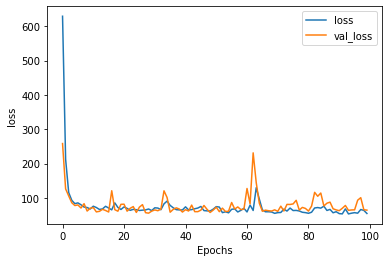

In [41]:
def plot_history(history, key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key, 'val_'+key])
    plt.show()
# Plot the history
plot_history(history, 'loss')

In [42]:
y_pred=model.predict(test_X)
mean_squared_error(test_y,y_pred)

49.42884621254314

# Our RandomForestRegressor model with tuned parameters performs best on our dataset